# First thing first. Lets import all packages.

In [1]:
import pandas as pd
import numpy as np
import random
import json
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from collections import Counter
import seaborn as sns

## Let's open the file and read it.

In [2]:
file = open('trending.json',encoding="utf8")
raw_data = json.load(file)
trending_videos_list = raw_data['collector']
df_tiktok_dataset = pd.DataFrame(trending_videos_list)
df_tiktok_dataset.head()

,id,text,createTime,authorMeta,musicMeta,covers,webVideoUrl,videoUrl,videoUrlNoWaterMark,videoMeta,diggCount,shareCount,playCount,commentCount,downloaded,mentions,hashtags
0,6907228749016714497,Confidence went 📈,1608214517,"{'id': '6825540583826768902', 'secUid': 'MS4wL...","{'musicId': '6790057285814061057', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,"{'height': 1024, 'width': 576, 'duration': 15}",3710,50,44800,68,True,[],[]
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,1600819763,"{'id': '6729292817489986566', 'secUid': 'MS4wL...","{'musicId': '6678927595137977094', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,"{'height': 1024, 'width': 576, 'duration': 11}",55700,1817,838100,936,True,[@dwight_schnuute],[]
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,1606228625,"{'id': '6791901371429913601', 'secUid': 'MS4wL...","{'musicId': '6881287666340481026', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,"{'height': 960, 'width': 540, 'duration': 19}",936200,21100,15300000,27100,True,[],"[{'id': '23428', 'name': 'tiktok', 'title': ''..."
3,6902819837345533186,,1607187987,"{'id': '6574079584262094854', 'secUid': 'MS4wL...","{'musicId': '6881107586830076678', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@naomivaneeren/video/69...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,"{'height': 1024, 'width': 576, 'duration': 13}",12900,197,94900,143,True,[],[]
4,6905635666588192002,小技です👟✨#tiktok教室#tutorial,1607843600,"{'id': '6586854399372394498', 'secUid': 'MS4wL...","{'musicId': '6649693417590754053', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@io.dreamer_mk/video/69...,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,,"{'height': 1024, 'width': 576, 'duration': 22}",8805,198,115300,52,True,[],"[{'id': '1627704798586882', 'name': 'tiktok教室'..."


Each cell contains a dictionary. Let's get  more familar by opening the cell with info about the author of first video

In [3]:
a=df_tiktok_dataset.loc[0,'authorMeta']
a

{'id': '6825540583826768902',
 'secUid': 'MS4wLjABAAAA1FfFjRMUzr0hX2YPT7pRr7bCPQWa-kU_kVo3HLghB9xPQsjgNl0iIxCKKV7BO-4f',
 'name': 'ninakleij',
 'nickName': 'Nina',
 'verified': False,
 'signature': 'don’t tell my instagram I’m here\n19 👸🏼',
 'avatar': 'https://p16-sign-sg.tiktokcdn.com/aweme/1080x1080/tos-alisg-avt-0068/bf750c969d404f541623e9e7d697b873.jpeg?x-expires=1608649200&x-signature=vWwNAWq%2BLTZ0rSaqn34kKJblJ4A%3D'}





## Now lets 'open' those cells and add them in extra columns

In [4]:
# Let's expand the hashtag cell containing lists to multiple rows
df_tiktok_dataset = df_tiktok_dataset.explode('hashtags').explode('mentions')

In [5]:
def object_to_columns(dfRow, **kwargs):
    '''Function to expand cells containing dictionaries, to columns'''
    for column, prefix in kwargs.items():
        if isinstance(dfRow[column], dict):
            for key, value in dfRow[column].items():
                columnName = '{}.{}'.format(prefix, key)
                dfRow[columnName] = value
    return dfRow

# Expand certain cells containing dictionaries to columns
df_tiktok_dataset = df_tiktok_dataset.apply(object_to_columns, 
                            authorMeta='authorMeta',  
                            musicMeta='musicMeta',
                            covers='cover',
                            videoMeta='videoMeta',
                            hashtags='hashtag', axis = 1)

# Remove the original columns containing the dictionaries
df_tiktok_dataset = df_tiktok_dataset.drop(['authorMeta','musicMeta','covers','videoMeta','hashtags'], axis = 1)

In [76]:
df_unique_videos.to_csv('MTP_dataviz.csv')

In [2]:
df_unique_videos=pd.read_csv('MTP_dataviz.csv')

In [54]:
df_unique_videos.drop(df_unique_videos.columns[0],axis=1, inplace=True)


In [4]:
df_unique_videos

,Unnamed: 0,Unnamed: 0.1,authorMeta.avatar,authorMeta.id,authorMeta.name,authorMeta.nickName,authorMeta.secUid,authorMeta.signature,authorMeta.verified,commentCount,...,videoMeta.height,videoMeta.width,videoUrl,videoUrlNoWaterMark,webVideoUrl,text_len,Datetime,Date,Time,Day_of_week
0,0,5436,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,6879693940111901701,billieeilish,BILLIE EILISH,MS4wLjABAAAAQC9D0J9C7zCdiToBJvaCHEZZl1FXTKeeSV...,18,True,625700,...,1024,576,https://v77.tiktokcdn.com/32f70877dfb208210e1f...,NaN,https://www.tiktok.com/@billieeilish/video/689...,1,2020-11-12 03:58:55,2020-11-12,03:58:55,3
1,1,1953,https://p16-sign-va.tiktokcdn.com/musically-ma...,6524904798586672143,spencerx,Spencer X,MS4wLjABAAAABKI9wkOM_rWwOAzNYfT4aCNzOdjVvtYaLA...,Mouth Music Man 🗣🎶,True,32000,...,1024,576,https://v33.tiktokcdn.com/46a3b5c3341d8dc0ddd2...,NaN,https://www.tiktok.com/@spencerx/video/6885766...,8,2020-10-20 19:12:03,2020-10-20,19:12:03,1
2,2,4053,https://p77-sign-sg.tiktokcdn.com/musically-ma...,6519530694208454666,condsty,Christoph,MS4wLjABAAAA_F4IuYTp8hrVuXHUoMyvp4p6RfAUibYMVE...,Please click here ⬆️\n Insta:🌷condsty_1 🌷\nco...,False,12200,...,1024,576,https://v77.tiktokcdn.com/b2b0c084fdbb3652c290...,NaN,https://www.tiktok.com/@condsty/video/68905712...,6,2020-11-02 16:55:47,2020-11-02,16:55:47,0
3,3,3520,https://p16-sign-sg.tiktokcdn.com/musically-ma...,6786990645367260165,lvl.up.martial.arts,Joost Raaijmaakers,MS4wLjABAAAAyZCuxhVllDFGY2tH6LLIMFSXJagPNCuTRf...,LvL-Up your life with martial arts\nNr1 rule h...,False,12500,...,1024,576,https://v77.tiktokcdn.com/159b4b14fe7bf774d370...,NaN,https://www.tiktok.com/@lvl.up.martial.arts/vi...,17,2020-10-06 08:48:40,2020-10-06,08:48:40,1
4,4,4881,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6772167972121527302,the_object,Object,MS4wLjABAAAAmmK7uSsQOlOGdJD98atMGBdJ-KajZ6sv_w...,🔎SIMPLE THINGS IN MACRO\n📥the_object@mail.ru\n...,False,18600,...,1024,576,https://v77.tiktokcdn.com/cc88b6af995626dea616...,NaN,https://www.tiktok.com/@the_object/video/69079...,2,2020-12-19 12:30:22,2020-12-19,12:30:22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2935,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6607408536295964678,mr.sajidkhan14,Beauti PathaN,MS4wLjABAAAAZwsDoGeR-pSXuefVAOTCGVvFs16HlV62ps...,کاش انہیں خواب ہی آ جائے کہ ہم\nان کے بغیر____...,False,12,...,1024,576,https://v77.tiktokcdn.com/0fab2f29c6c3f77fc397...,NaN,https://www.tiktok.com/@mr.sajidkhan14/video/6...,6,2020-10-21 14:11:38,2020-10-21,14:11:38,2
996,996,1862,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6866276594635359234,risingstar93,Rising star,MS4wLjABAAAAf4D3fvqS3IOoSqCNpXX4K-PkjjJ43EfYR9...,Famous account block\n😢😢😢\nplease sport me,False,5,...,960,544,https://v77.tiktokcdn.com/582446f0dfdb766e2b6c...,NaN,https://www.tiktok.com/@risingstar93/video/688...,9,2020-10-20 13:12:28,2020-10-20,13:12:28,1
997,997,4844,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6849016548334502918,zubair_rajput1,Zubair ❤,MS4wLjABAAAAzYy5L6H0ekRZD86YKIl7D9LP6PoDYA2c9N...,#Pakistani#🇵🇰 \n#😎l live in karachi#🏏\n#single...,False,2,...,1024,576,https://v77.tiktokcdn.com/ea87571d12b34fc32d33...,NaN,https://www.tiktok.com/@zubair_rajput1/video/6...,15,2020-10-31 09:22:50,2020-10-31,09:22:50,5
998,998,4639,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,310996977805283328,jarcage,Jar Cage,MS4wLjABAAAAcewtgZObMcVeznJMJ5jkzJqa_rWwT1vQRp...,"geen haters, maar liefde😘 duet😗\nleef van humo...",False,2,...,1024,576,https://v77.tiktokcdn.com/83f8705f827acc7ed2d1...,NaN,https://www.tiktok.com/@jarcage/video/68920729...,11,2020-11-06 18:03:03,2020-11-06,18:03:03,4


### For 1000 unique videos there are 907 unique songs and 802 unique authors.

In [3]:
df_unique_videos = df_tiktok_dataset.drop_duplicates(subset='id', keep="first")
df_unique_music = df_tiktok_dataset.drop_duplicates(subset='musicMeta.musicId', keep="first")
df_unique_authors = df_tiktok_dataset.drop_duplicates(subset='authorMeta.id', keep="first")

# Show amount of rows per dataset
{
    
    'df_tiktok_dataset': df_tiktok_dataset.shape,
    'df_unique_videos': df_unique_videos.shape,
    'df_unique_music': df_unique_music.shape,
    'df_unique_authors': df_unique_authors.shape
}

NameError: name 'df_tiktok_dataset' is not defined

In [70]:
df_unique_videos_sorted=df_unique_videos.sort_values(by=['diggCount'],ascending=False)
df_unique_videos_sorted[['diggCount']]
df_unique_videos_sorted

,Unnamed: 0,Unnamed: 0.1,authorMeta.avatar,authorMeta.id,authorMeta.name,authorMeta.nickName,authorMeta.secUid,authorMeta.signature,authorMeta.verified,commentCount,...,musicMeta.playUrl,playCount,shareCount,text,videoMeta.duration,videoMeta.height,videoMeta.width,videoUrl,videoUrlNoWaterMark,webVideoUrl
5436,5436,947,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,6879693940111901701,billieeilish,BILLIE EILISH,MS4wLjABAAAAQC9D0J9C7zCdiToBJvaCHEZZl1FXTKeeSV...,18,True,625700,...,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,250800000,220100,#TimeWarpScan,9,1024,576,https://v77.tiktokcdn.com/32f70877dfb208210e1f...,NaN,https://www.tiktok.com/@billieeilish/video/689...
1953,1953,349,https://p16-sign-va.tiktokcdn.com/musically-ma...,6524904798586672143,spencerx,Spencer X,MS4wLjABAAAABKI9wkOM_rWwOAzNYfT4aCNzOdjVvtYaLA...,Mouth Music Man 🗣🎶,True,32000,...,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,44600000,31600,Beatbox keeping me sane before my flight 🗣✈️,12,1024,576,https://v33.tiktokcdn.com/46a3b5c3341d8dc0ddd2...,NaN,https://www.tiktok.com/@spencerx/video/6885766...
4053,4053,706,https://p77-sign-sg.tiktokcdn.com/musically-ma...,6519530694208454666,condsty,Christoph,MS4wLjABAAAA_F4IuYTp8hrVuXHUoMyvp4p6RfAUibYMVE...,Please click here ⬆️\n Insta:🌷condsty_1 🌷\nco...,False,12200,...,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,68700000,110900,How to draw hand #artchallenge #drawing,14,1024,576,https://v77.tiktokcdn.com/b2b0c084fdbb3652c290...,NaN,https://www.tiktok.com/@condsty/video/68905712...
3520,3520,608,https://p16-sign-sg.tiktokcdn.com/musically-ma...,6786990645367260165,lvl.up.martial.arts,Joost Raaijmaakers,MS4wLjABAAAAyZCuxhVllDFGY2tH6LLIMFSXJagPNCuTRf...,LvL-Up your life with martial arts\nNr1 rule h...,False,12500,...,https://sf77-sg.tiktokcdn.com/obj/tiktok-obj/0...,50500000,20000,How not to do it and how you should do the tec...,14,1024,576,https://v77.tiktokcdn.com/159b4b14fe7bf774d370...,NaN,https://www.tiktok.com/@lvl.up.martial.arts/vi...
4881,4881,848,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6772167972121527302,the_object,Object,MS4wLjABAAAAmmK7uSsQOlOGdJD98atMGBdJ-KajZ6sv_w...,🔎SIMPLE THINGS IN MACRO\n📥the_object@mail.ru\n...,False,18600,...,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,37900000,13400,Pencil #amazing,10,1024,576,https://v77.tiktokcdn.com/cc88b6af995626dea616...,NaN,https://www.tiktok.com/@the_object/video/69079...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,508,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6607408536295964678,mr.sajidkhan14,Beauti PathaN,MS4wLjABAAAAZwsDoGeR-pSXuefVAOTCGVvFs16HlV62ps...,کاش انہیں خواب ہی آ جائے کہ ہم\nان کے بغیر____...,False,12,...,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,1853,69,video khrb ogae 😂😂#newtrend #foryou #foryoupage,14,1024,576,https://v77.tiktokcdn.com/0fab2f29c6c3f77fc397...,NaN,https://www.tiktok.com/@mr.sajidkhan14/video/6...
1862,1862,331,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6866276594635359234,risingstar93,Rising star,MS4wLjABAAAAf4D3fvqS3IOoSqCNpXX4K-PkjjJ43EfYR9...,Famous account block\n😢😢😢\nplease sport me,False,5,...,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,1418,1,Tiktok Unband Special 😜😜😜#comedy #foryoupage #...,10,960,544,https://v77.tiktokcdn.com/582446f0dfdb766e2b6c...,NaN,https://www.tiktok.com/@risingstar93/video/688...
4844,4844,841,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6849016548334502918,zubair_rajput1,Zubair ❤,MS4wLjABAAAAzYy5L6H0ekRZD86YKIl7D9LP6PoDYA2c9N...,#Pakistani#🇵🇰 \n#😎l live in karachi#🏏\n#single...,False,2,...,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,5377,2,AK pal ki ab to dure na muj ko Dana❤❤#foryou #...,15,1024,576,https://v77.tiktokcdn.com/ea87571d12b34fc32d33...,NaN,https://www.tiktok.com/@zubair_rajput1/video/6...
4639,4639,813,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,310996977805283328,jarcage,Jar Cage,MS4wLjABAAAAcewtgZObMcVeznJMJ5jkzJqa_rWwT1vQRp...,"geen haters, ma

## We can notice an outlire - 3,1 mills. Will note include it?

Convert timestamp to the datetime

In [251]:
# extracting date from timestamp
df_unique_videos['Datetime'] = [datetime.fromtimestamp(d) for d in df_unique_videos['createTime']] 
df_unique_videos['Date']=[d.date() for d in df_unique_videos['Datetime']] 
df_unique_videos['Time']=[d.time() for d in df_unique_videos['Datetime']] 

In [254]:
df_unique_videos.iloc[5,:]

Unnamed: 0                                                              4129
authorMeta.avatar          https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...
authorMeta.id                                             283110471266684928
authorMeta.name                                                 maxime_spam1
authorMeta.nickName                                                   Maxime
authorMeta.secUid          MS4wLjABAAAATNhiEnGXAOJa1PL11ga6UNHNYdZBvl6RNh...
authorMeta.signature                      Merciiii pour les 100K d’abonnés😁💕
authorMeta.verified                                                    False
commentCount                                                           61200
cover.default              https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...
cover.dynamic              https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...
cover.origin               https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...
createTime                                                        1608387468

In [110]:
df_unique_videos=df_unique_videos_sorted.drop(df_unique_videos_sorted.columns[0:2],axis=1)
df_unique_videos.columns[0]

'authorMeta.avatar'

## Text analysis

In [264]:
df_unique_videos=pd.read_csv('MTP_dataviz.csv')

In [391]:
index_playcount=list(df_unique_videos.columns).index('playCount')
index_text=list(df_unique_videos.columns).index('text')
index_text_len=list(df_unique_videos.columns).index('text_len')
index_hashtag_len=list(df_unique_videos.columns).index('hashtag_len')

44

In [267]:
df_unique_videos.drop(columns=df_unique_videos.columns[0])
df_unique_videos.set_index(df_unique_videos.columns[0])

,Unnamed: 0.1,authorMeta.avatar,authorMeta.id,authorMeta.name,authorMeta.nickName,authorMeta.secUid,authorMeta.signature,authorMeta.verified,commentCount,cover.default,...,videoMeta.height,videoMeta.width,videoUrl,videoUrlNoWaterMark,webVideoUrl,text_len,Datetime,Date,Time,Day_of_week
0,5436,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,6879693940111901701,billieeilish,BILLIE EILISH,MS4wLjABAAAAQC9D0J9C7zCdiToBJvaCHEZZl1FXTKeeSV...,18,True,625700,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,...,1024,576,https://v77.tiktokcdn.com/32f70877dfb208210e1f...,NaN,https://www.tiktok.com/@billieeilish/video/689...,1,2020-11-12 03:58:55,2020-11-12,03:58:55,3
1,1953,https://p16-sign-va.tiktokcdn.com/musically-ma...,6524904798586672143,spencerx,Spencer X,MS4wLjABAAAABKI9wkOM_rWwOAzNYfT4aCNzOdjVvtYaLA...,Mouth Music Man 🗣🎶,True,32000,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,...,1024,576,https://v33.tiktokcdn.com/46a3b5c3341d8dc0ddd2...,NaN,https://www.tiktok.com/@spencerx/video/6885766...,8,2020-10-20 19:12:03,2020-10-20,19:12:03,1
2,4053,https://p77-sign-sg.tiktokcdn.com/musically-ma...,6519530694208454666,condsty,Christoph,MS4wLjABAAAA_F4IuYTp8hrVuXHUoMyvp4p6RfAUibYMVE...,Please click here ⬆️\n Insta:🌷condsty_1 🌷\nco...,False,12200,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,1024,576,https://v77.tiktokcdn.com/b2b0c084fdbb3652c290...,NaN,https://www.tiktok.com/@condsty/video/68905712...,6,2020-11-02 16:55:47,2020-11-02,16:55:47,0
3,3520,https://p16-sign-sg.tiktokcdn.com/musically-ma...,6786990645367260165,lvl.up.martial.arts,Joost Raaijmaakers,MS4wLjABAAAAyZCuxhVllDFGY2tH6LLIMFSXJagPNCuTRf...,LvL-Up your life with martial arts\nNr1 rule h...,False,12500,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,1024,576,https://v77.tiktokcdn.com/159b4b14fe7bf774d370...,NaN,https://www.tiktok.com/@lvl.up.martial.arts/vi...,17,2020-10-06 08:48:40,2020-10-06,08:48:40,1
4,4881,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6772167972121527302,the_object,Object,MS4wLjABAAAAmmK7uSsQOlOGdJD98atMGBdJ-KajZ6sv_w...,🔎SIMPLE THINGS IN MACRO\n📥the_object@mail.ru\n...,False,18600,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,1024,576,https://v77.tiktokcdn.com/cc88b6af995626dea616...,NaN,https://www.tiktok.com/@the_object/video/69079...,2,2020-12-19 12:30:22,2020-12-19,12:30:22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2935,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6607408536295964678,mr.sajidkhan14,Beauti PathaN,MS4wLjABAAAAZwsDoGeR-pSXuefVAOTCGVvFs16HlV62ps...,کاش انہیں خواب ہی آ جائے کہ ہم\nان کے بغیر____...,False,12,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,1024,576,https://v77.tiktokcdn.com/0fab2f29c6c3f77fc397...,NaN,https://www.tiktok.com/@mr.sajidkhan14/video/6...,6,2020-10-21 14:11:38,2020-10-21,14:11:38,2
996,1862,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6866276594635359234,risingstar93,Rising star,MS4wLjABAAAAf4D3fvqS3IOoSqCNpXX4K-PkjjJ43EfYR9...,Famous account block\n😢😢😢\nplease sport me,False,5,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,960,544,https://v77.tiktokcdn.com/582446f0dfdb766e2b6c...,NaN,https://www.tiktok.com/@risingstar93/video/688...,9,2020-10-20 13:12:28,2020-10-20,13:12:28,1
997,4844,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6849016548334502918,zubair_rajput1,Zubair ❤,MS4wLjABAAAAzYy5L6H0ekRZD86YKIl7D9LP6PoDYA2c9N...,#Pakistani#🇵🇰 \n#😎l live in karachi#🏏\n#single...,False,2,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,1024,576,https://v77.tiktokcdn.com/ea87571d12b34fc32d33...,NaN,https://www.tiktok.com/@zubair_rajput1/video/6...,15,2020-10-31 09:22:50,2020-10-31,09:22:50,5
998,4639,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,310996977805283328,jarcage,Jar Cage,MS4wLjABAAAAcewtgZObMcVeznJMJ5jkzJqa_rWwT1vQRp...,"geen haters, maar liefde😘 duet😗\nleef van humo...",False,2,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,1024,576,https://v77.tiktokcdn.com/83f8705f827acc7ed2d1...,

In [387]:
df_unique_videos

,Unnamed: 0,Unnamed: 0.1,authorMeta.avatar,authorMeta.id,authorMeta.name,authorMeta.nickName,authorMeta.secUid,authorMeta.signature,authorMeta.verified,commentCount,...,videoMeta.width,videoUrl,videoUrlNoWaterMark,webVideoUrl,text_len,Datetime,Date,Time,Day_of_week,hashtag_len
0,0,5436,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,6879693940111901701,billieeilish,BILLIE EILISH,MS4wLjABAAAAQC9D0J9C7zCdiToBJvaCHEZZl1FXTKeeSV...,18,True,625700,...,576,https://v77.tiktokcdn.com/32f70877dfb208210e1f...,NaN,https://www.tiktok.com/@billieeilish/video/689...,1,2020-11-12 03:58:55,2020-11-12,03:58:55,3,0
1,1,1953,https://p16-sign-va.tiktokcdn.com/musically-ma...,6524904798586672143,spencerx,Spencer X,MS4wLjABAAAABKI9wkOM_rWwOAzNYfT4aCNzOdjVvtYaLA...,Mouth Music Man 🗣🎶,True,32000,...,576,https://v33.tiktokcdn.com/46a3b5c3341d8dc0ddd2...,NaN,https://www.tiktok.com/@spencerx/video/6885766...,8,2020-10-20 19:12:03,2020-10-20,19:12:03,1,0
2,2,4053,https://p77-sign-sg.tiktokcdn.com/musically-ma...,6519530694208454666,condsty,Christoph,MS4wLjABAAAA_F4IuYTp8hrVuXHUoMyvp4p6RfAUibYMVE...,Please click here ⬆️\n Insta:🌷condsty_1 🌷\nco...,False,12200,...,576,https://v77.tiktokcdn.com/b2b0c084fdbb3652c290...,NaN,https://www.tiktok.com/@condsty/video/68905712...,6,2020-11-02 16:55:47,2020-11-02,16:55:47,0,0
3,3,3520,https://p16-sign-sg.tiktokcdn.com/musically-ma...,6786990645367260165,lvl.up.martial.arts,Joost Raaijmaakers,MS4wLjABAAAAyZCuxhVllDFGY2tH6LLIMFSXJagPNCuTRf...,LvL-Up your life with martial arts\nNr1 rule h...,False,12500,...,576,https://v77.tiktokcdn.com/159b4b14fe7bf774d370...,NaN,https://www.tiktok.com/@lvl.up.martial.arts/vi...,17,2020-10-06 08:48:40,2020-10-06,08:48:40,1,0
4,4,4881,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6772167972121527302,the_object,Object,MS4wLjABAAAAmmK7uSsQOlOGdJD98atMGBdJ-KajZ6sv_w...,🔎SIMPLE THINGS IN MACRO\n📥the_object@mail.ru\n...,False,18600,...,576,https://v77.tiktokcdn.com/cc88b6af995626dea616...,NaN,https://www.tiktok.com/@the_object/video/69079...,2,2020-12-19 12:30:22,2020-12-19,12:30:22,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2935,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6607408536295964678,mr.sajidkhan14,Beauti PathaN,MS4wLjABAAAAZwsDoGeR-pSXuefVAOTCGVvFs16HlV62ps...,کاش انہیں خواب ہی آ جائے کہ ہم\nان کے بغیر____...,False,12,...,576,https://v77.tiktokcdn.com/0fab2f29c6c3f77fc397...,NaN,https://www.tiktok.com/@mr.sajidkhan14/video/6...,6,2020-10-21 14:11:38,2020-10-21,14:11:38,2,0
996,996,1862,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6866276594635359234,risingstar93,Rising star,MS4wLjABAAAAf4D3fvqS3IOoSqCNpXX4K-PkjjJ43EfYR9...,Famous account block\n😢😢😢\nplease sport me,False,5,...,544,https://v77.tiktokcdn.com/582446f0dfdb766e2b6c...,NaN,https://www.tiktok.com/@risingstar93/video/688...,9,2020-10-20 13:12:28,2020-10-20,13:12:28,1,0
997,997,4844,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6849016548334502918,zubair_rajput1,Zubair ❤,MS4wLjABAAAAzYy5L6H0ekRZD86YKIl7D9LP6PoDYA2c9N...,#Pakistani#🇵🇰 \n#😎l live in karachi#🏏\n#single...,False,2,...,576,https://v77.tiktokcdn.com/ea87571d12b34fc32d33...,NaN,https://www.tiktok.com/@zubair_rajput1/video/6...,15,2020-10-31 09:22:50,2020-10-31,09:22:50,5,0
998,998,4639,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,310996977805283328,jarcage,Jar Cage,MS4wLjABAAAAcewtgZObMcVeznJMJ5jkzJqa_rWwT1vQRp...,"geen haters, maar liefde😘 duet😗\nleef van humo...",False,2,...,576,https://v77.tiktokcdn.com/83f8705f827acc7ed2d1...,NaN,https://www.tiktok.com/@jarcage/video/68920729...,11,2020-11-06 18:03:03,2020-11-06,18:03:03,4,0


In [172]:
df_unique_videos['text_len']=0

In [385]:
df_unique_videos['hashtag_len']=0

In [396]:
i=0
for txt in df_unique_videos['text']:
    i+=1
    if isinstance(txt, str):
        a=txt.split()
    df_unique_videos.iloc[i-1,index_text_len]=len(a)

In [409]:
i=0
for txt in df_unique_videos['text']:
    if isinstance(txt, str):
        a=txt.split()
    i+=1
    words=[]
    for word in a:
        if word.startswith('#'):
            word=word.replace('#','')
            words.append(word.lower())
    df_unique_videos.iloc[i-1,index_hashtag_len]=len(words)

In [413]:
popular_hashtags_A=[]
popular_hashtags_B=[]
popular_hashtags_C=[]
i=0
dict_text={}
for txt in df_unique_videos['text']:
    if isinstance(txt, str):
        a=txt.split()
    i+=1
    for word in a:
        if word.startswith('#'):
            #print(word)
            word=word.replace('#','')
            words.append(word.lower())
            if df_unique_videos.iloc[i-1,index_playcount]>2800000:
                popular_hashtags_A.append(word.lower())
            elif df_unique_videos.iloc[i-1,index_playcount]<2800000 and df_unique_videos.iloc[i-1,30]>=196900:
                popular_hashtags_B.append(word.lower())
            elif df_unique_videos.iloc[i-1,index_playcount]<196900:
                popular_hashtags_C.append(word.lower())           
            
        else:
            continue
print(len(popular_hashtags_A))
print(len(popular_hashtags_B))
print(len(popular_hashtags_C))

149
1175
4084


In [415]:
print(popular_hashtags_A)
print(len(popular_hashtags_B))
print(len(popular_hashtags_C))

['timewarpscan', 'artchallenge', 'drawing', 'martialarts', 'selfdefence', 'techniques', 'yep', 'nope', 'amazing', 'duo', 'fyp', 'animal', 'tombé', 'de', 'haut', 'mask', 'vindiesel', 'kfcmakeitlegendary', 'vibewithvin', 'funny', 'tiktokcreator', 'creative', 'jadsedardkomitao', 'photo', 'vfx', 'gopro', 'sunset', 'photomagic', 'poto', 'fly', 'fyp', 'verifyme', 'thekiryalife', 'prank', 'reaction', 'pickupline', 'пранк', 'реакции', 'foryou', 'tiktok', 'viral', 'fyp', 'iphone', 'test', 'bend', 'stitch', 'foryou', 'viral', 'fy', 'fyp', 'foryoupage', 'drawing', 'jinglebells', 'a380', 'thaiairways', 'miniaturwunderland', 'christmasmusic', 'duet', 'africa', 'toto', '80s', 'fyp', 'foryoupage', 'foryou', 'theataris', 'quietdrive', 'popgoespunk', 'punkrock', 'poppunk', 'cover', 'zyxcba', 'drummer', 'yzfamily', 'fürdich', 'fyp', 'foryoupage', 'shuffle', 'giraffe', 'smoothcriminal', 'wantthischallenge', 'fyp', 'foryou', 'fitness', 'toolstour', 'drillbit', 'electrician', 'toolsamazonfinds', 'homedep',

In [135]:
len(popular_words1)

1175

In [123]:
wordcloud = WordCloud().generate(popular_words)

NameError: name 'WordCloud' is not defined

In [275]:
hashtags_A=[]
hashtags_B=[]
hashtags_C=[]
k=0
for txt in df_unique_videos['hashtag.name']:
    k+=1
    if str(txt)!='nan':
        c=txt.split()
        for wor in c:    
            if df_unique_videos.iloc[k-1,index_playcount]>2800000:
                hashtags_A.append(wor.lower())
            elif df_unique_videos.iloc[k-1,index_playcount]<2800000 and df_unique_videos.iloc[k-1,30]>=196900:
                hashtags_B.append(wor.lower())
            elif df_unique_videos.iloc[k-1,index_playcount]<196900:
                hashtags_C.append(wor.lower())
    else:
        continue
print(len(hashtags_A))
print(len(hashtags_B))
print(len(hashtags_C))

31
195
624


In [276]:
popular_hashtags_A.extend(hashtags_A)
popular_hashtags_B.extend(hashtags_B)
popular_hashtags_C.extend(hashtags_C)

In [277]:
print(len(popular_hashtags_A))
print(len(popular_hashtags_B))
print(len(popular_hashtags_C))

180
1370
4708


In [366]:
def count_hashtags(list_words):
    df=pd.DataFrame({'Hashtag':[],'Counts':[]})
    counts=dict()
    for word in list_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    df.Hashtag=counts.keys()
    df.Counts=counts.values()
    return df

In [419]:
counts_A=count_words(popular_hashtags_A)
counts_A=counts_A.sort_values(by=['Counts'],ascending=False)
counts_B=count_words(popular_hashtags_B)
counts_B=counts_B.sort_values(by=['Counts'],ascending=False)
counts_C=count_words(popular_hashtags_C)
counts_C=counts_C.sort_values(by=['Counts'],ascending=False)
#counts_C.sort_values(by='Counts',ascending=False,inplace=True)

In [420]:
def draw_tufte_bar(d,k,n,m):
    n=1
    k=1
    m=1
    from matplotlib import rc

    # %%  matplotlib viz setup
    rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
    rc('text')

    # %% fake data
    categories = d[d.columns[0]][0:10]
    counts = d[d.columns[1]][0:10]

    # %% visualization

    # data series
    pos = np.arange(0, len(categories), 1)

    # figure framework
    #fig = plt.figure(figsize=(12, 6), frameon=True)
    ax = fig.add_subplot(n,m, k)

    # plot data
    ax.bar(pos, counts, color='gray', edgecolor='white')

    # axes properties
    ax.set_xticks(pos)
    ax.set_xticklabels(categories, rotation='vertical')
    #ax.set_xlabel('Publication year')
    #ax.set_ylabel('Counts of studies')
    #ax.set_ylabel('Counts of articles')

    # hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(True, axis='y', ls=':', color='white')
    return plt.show()


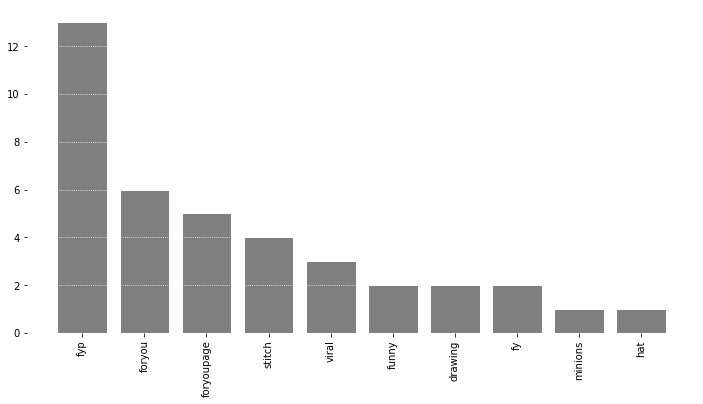

In [421]:
fig = plt.figure(figsize=(12, 6), frameon=True)
list_to_draw=[counts_A,counts_B,counts_C]
j=0
for i in list_to_draw:
    j+=1
    draw_tufte_bar(i,j,3,1)

In [380]:
for i in range(3):
    print(i)

0
1
2


In [376]:
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=False)

# %% fake data
categories = list(counts_A.keys())
categories=categories.sort(reverse=True)
categories=categories[0:9]
counts = list(counts_A.values())

# %% visualization

# data series
pos = np.arange(0, len(categories), 1)

# figure framework
fig = plt.figure(figsize=(18, 10), frameon=True)
ax = fig.add_subplot(1, 1, 1)

# plot data
ax.bar(pos, counts, color='gray', edgecolor='white')

# axes properties
ax.set_xticks(pos)
ax.set_xticklabels(categories, rotation='vertical')
#ax.set_xlabel('Publication year')
#ax.set_ylabel('Counts of studies')
#ax.set_ylabel('Counts of articles')

# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# grid
ax.grid(True, axis='y', ls=':', color='white')

# save plot to file
out_f = os.path.join(os.getcwd(), 'tufte_barchart.png')
plt.savefig(out_f,
            transparent=True,
            bbox_inches='tight',
            pad_inches=0,
            dpi=600)

# show plot
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [375]:
categories = counts_C[counts_C.columns[0]][0:10]
counts = counts_C[counts_C.columns[1]]
categories

4                fyp
3             foryou
88        foryoupage
85                fy
110          fitness
147          workout
36     horadearrasar
81              duet
75           voorjou
84        transition
6          animeedit
Name: Hashtag, dtype: object

In [341]:
import collections
sorted_x = sorted(counts_A.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_x)
sorted_dict.values()

odict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 6, 7, 7, 16])

In [255]:
df_unique_videos['Day_of_week']= [i.weekday() for i in df_unique_videos['Datetime']]

In [187]:
df_unique_videos['Hour_posted']= [i.hour for i in df_unique_videos['Datetime']]

/var/folders/lp/kfk0rkcj6bj31b_4y46369qr0000gn/T/ipykernel_30156/2283275915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_videos['Hour_posted']= [i.hour for i in df_unique_videos['Datetime']]


(array([29., 40., 31., 24., 11., 17., 15., 20., 19., 28., 25., 47., 47.,
        49., 73., 74., 75., 69., 77., 60., 43., 53., 39., 35.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

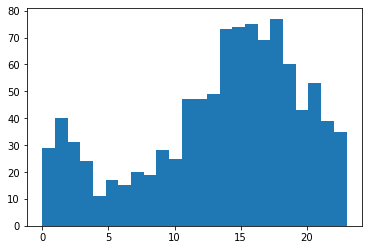

In [192]:
df_unique_videos['Hour_posted']
plt.hist(df_unique_videos['Hour_posted'],bins=24)

Dependent: 'commentCount','diggCount','mentions','playCount', 'shareCount','authorMeta.verified'
Independend: 'Hour_posted','authorMeta.verified', hashtags/text

In [ ]:
df_unique_videos['commentCount','diggCount','mentions','playCount', 'shareCount','authorMeta.verified',

(array([127., 133., 166., 153., 151., 123., 147.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

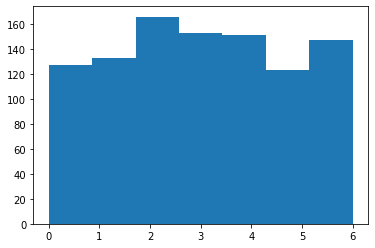

In [193]:
plt.hist(df_unique_videos['Day_of_week'],bins=7)

<BarContainer object of 2 artists>

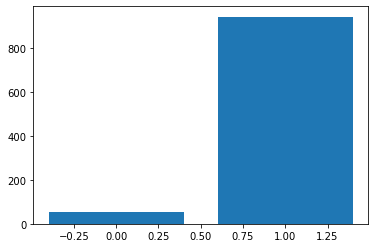

In [216]:
plt.bar([0,1],[len(df_unique_videos[df_unique_videos['authorMeta.verified']==True]),
                                    len(df_unique_videos[df_unique_videos['authorMeta.verified']==False])])

In [194]:
df_unique_videos.to_csv('regression_viz.csv')

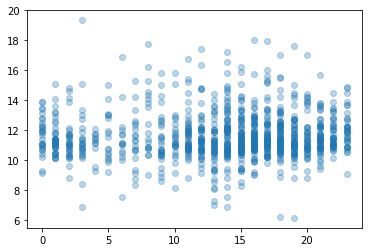

In [202]:
plt.scatter(df_unique_videos['Hour_posted'],[np.log(i) for i in df_unique_videos['playCount']],alpha=0.3)

In [206]:
with_dimmies=pd.get_dummies(df_unique_videos,drop_first=True,columns=['authorMeta.verified'])

In [209]:
with_dimmies.to_csv('regression1_viz.csv')


In [210]:
with_dimmies

,Unnamed: 0,authorMeta.avatar,authorMeta.id,authorMeta.name,authorMeta.nickName,authorMeta.secUid,authorMeta.signature,commentCount,cover.default,cover.dynamic,...,videoMeta.width,videoUrl,videoUrlNoWaterMark,webVideoUrl,Datetime,Date,Time,Day_of_week,Hour_posted,authorMeta.verified_True
0,0,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6825540583826768902,ninakleij,Nina,MS4wLjABAAAA1FfFjRMUzr0hX2YPT7pRr7bCPQWa-kU_kV...,don’t tell my instagram I’m here\n19 👸🏼,68,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,576,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,NaN,https://www.tiktok.com/@ninakleij/video/690722...,2020-12-17 14:15:17,2020-12-17,14:15:17,3,14,0
1,1,https://p16-sign-va.tiktokcdn.com/musically-ma...,6729292817489986566,joeysofo,JoeySofo,MS4wLjABAAAAvkCSTiPWJm7Ctqp7AN3mauS_Bi8tVrbtBg...,Tinder couldn’t help me lose my virginity so I...,936,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,...,576,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,NaN,https://www.tiktok.com/@joeysofo/video/6875468...,2020-09-23 01:09:23,2020-09-23,01:09:23,2,1,0
2,2,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6791901371429913601,jackeyephone,JackJacko,MS4wLjABAAAAsI8XQOceYtnIhIbLZLhvz24tOWdWYavlPe...,Zakelijk 📩 jackeyephone@gmail.com\nInstagram: ...,27100,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,540,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,NaN,https://www.tiktok.com/@jackeyephone/video/689...,2020-11-24 14:37:05,2020-11-24,14:37:05,1,14,0
8,3,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6574079584262094854,naomivaneeren,Naomi van eeren ✨,MS4wLjABAAAAPfdkn_2Eu2__LdAOUeGO8z3mYALisMlAo3...,Just for fun,143,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,576,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,NaN,https://www.tiktok.com/@naomivaneeren/video/69...,2020-12-05 17:06:27,2020-12-05,17:06:27,5,17,0
9,4,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6586854399372394498,io.dreamer_mk,io. Dreamer,MS4wLjABAAAAqwdQMoXzQWa8Zg8uIlLjIzNDK9dJ_0hiNK...,Dance tutorial🌏🤍\n動画レクチャー/教室はインスタにDMを YouTube→...,52,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,576,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,NaN,https://www.tiktok.com/@io.dreamer_mk/video/69...,2020-12-13 07:13:20,2020-12-13,07:13:20,6,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,995,https://p16-sign-sg.tiktokcdn.com/musically-ma...,6788447048146600965,artistmiranda,ArtistMiranda,MS4wLjABAAAACBC2pRswe-KJ0WZf4hCL1jmLzNYPqulIKV...,🎨 Art of pouring acrylic\nInstagram @Artist_Mi...,111,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,576,https://v77.tiktokcdn.com/12644d87ac40de1c1ab2...,NaN,https://www.tiktok.com/@artistmiranda/video/68...,2020-09-27 16:36:10,2020-09-27,16:36:10,6,16,0
5673,996,https://p16-sign-va.tiktokcdn.com/musically-ma...,6718786745917506565,papaswolio,Papa Swolio,MS4wLjABAAAA6QnDS07MPs4yJwUEKhujugbhWLIoeaRN4M...,GTTFG!!!\n❌ NO JABRONIS ALLOWED ❌ \nFitness Wi...,321,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,https://p16-sign-sg.tiktokcdn.com/obj/tos-mali...,...,576,https://v77.tiktokcdn.com/740d0b0889f43900715c...,NaN,https://www.tiktok.com/@papaswolio/video/69080...,2020-12-19 20:39:26,2020-12-19,20:39:26,5,20,0
5681,997,https://p16-sign-sg.tiktokcdn.com/aweme/1080x1...,6792309272296129541,sanaelfarah,Sana El Farah,MS4wLjABAAAAS2J7uwHog9kQDcS9_1rAuYDm3rue1TjBnM...,Instagram: sanaelfarah\n🇲🇦🇳🇱,668,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,https://p16-sign-sg.tiktokcdn.com/obj/tos-alis...,...,576,https://v77.tiktokcdn.com/eed7b93664d2cfa5b122...,NaN,https://www.tiktok.com/@sanaelfarah/video/6883...,2020-10-14 15:34:39,2020-10-14,15:34:3

<BarContainer object of 7 artists>

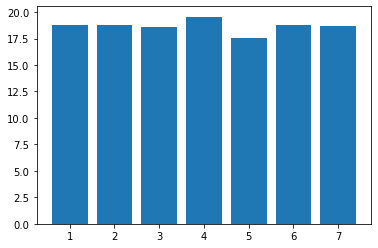

In [234]:
plt.bar([1,2,3,4,5,6,7],np.log(y))

In [218]:
#df_unique_videos['Day_of_week']
y=df_unique_videos.groupby(['Day_of_week'])['playCount'].agg('sum')

In [227]:
np.mean(df_unique_videos['videoMeta.duration'])

19.055

(array([203., 450.,  85.,  67.,  46.,  31.,  23.,  14.,  25.,  56.]),
 array([ 4. ,  9.6, 15.2, 20.8, 26.4, 32. , 37.6, 43.2, 48.8, 54.4, 60. ]),
 <BarContainer object of 10 artists>)

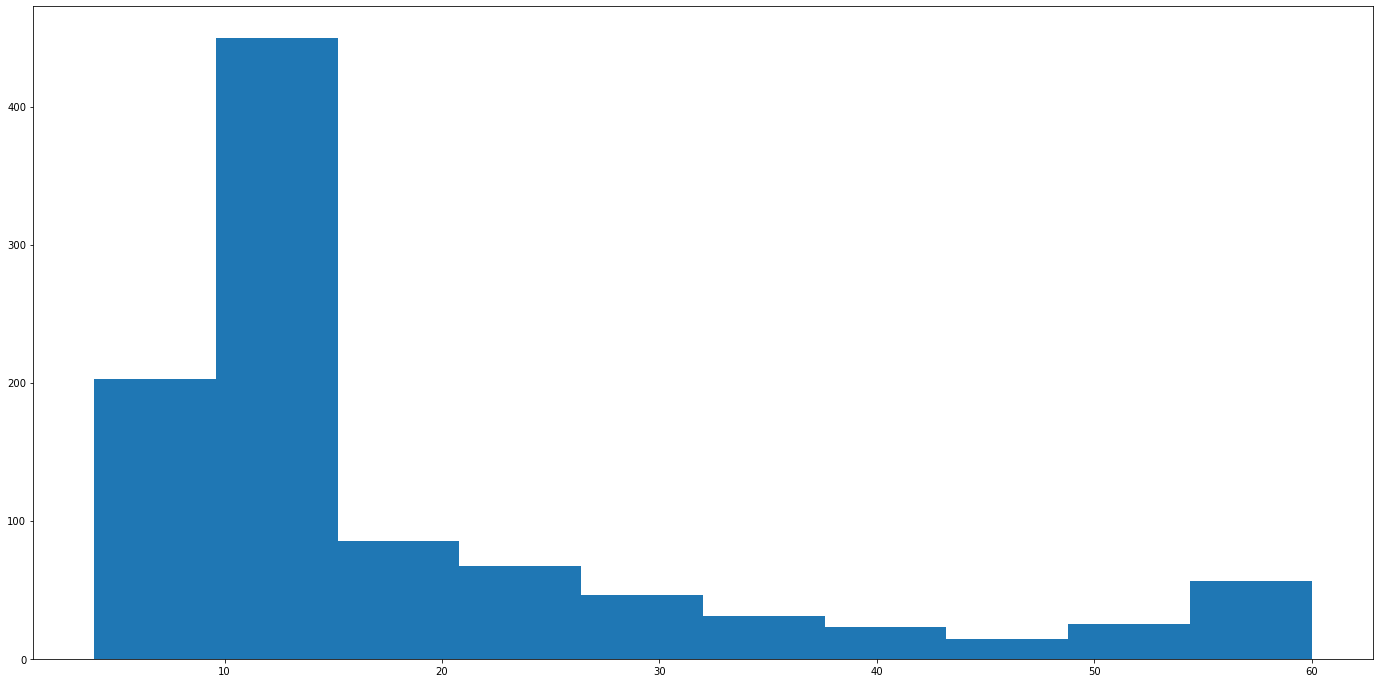

In [230]:
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111)
ax.hist(df_unique_videos['videoMeta.duration'])

In [ ]:
['videoMeta.duration',

In [5]:
print(values)

[38.0, 29, 8, 7, 28, 38.0]


In [6]:
print(categories)

['var1', 'var2', 'var3', 'var4', 'var5']


In [ ]:
df_unique_videos['Cum_play']=

In [ ]:
df_unique_videos_sorted[['diggCount']]

0       1
1       8
2       6
3      17
4       2
       ..
995     6
996     9
997    15
998    11
999    11
Name: text_len, Length: 1000, dtype: int64

In [384]:
#fig = plt.figure(figsize=(24,12))
len_for_seaborn=np.array(df_unique_videos['text_len'])

<AxesSubplot:xlabel='hashtag_len', ylabel='playCount'>

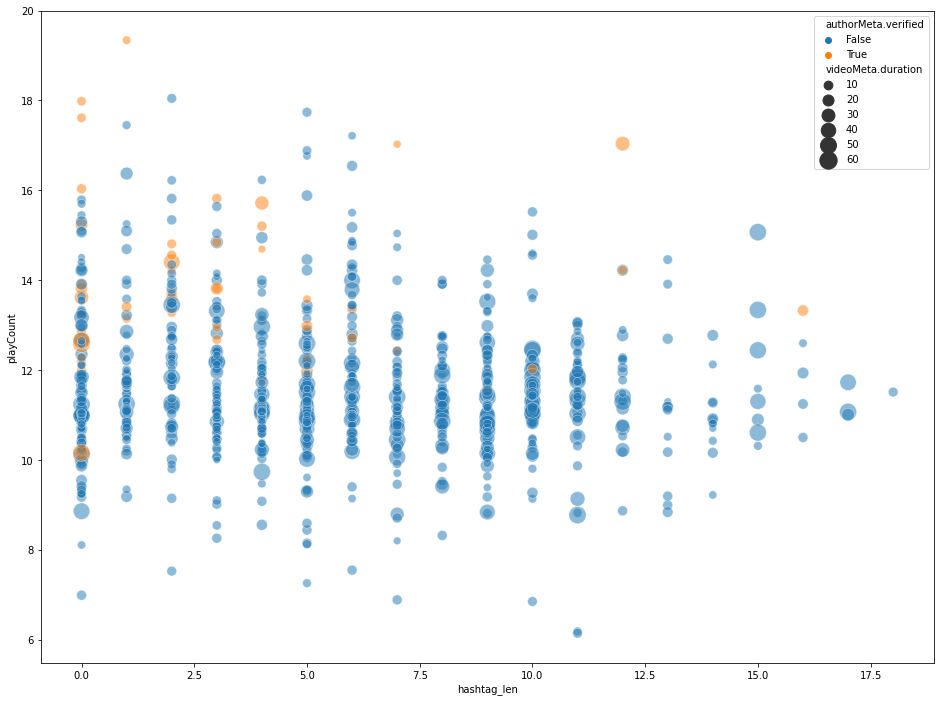

In [418]:
fig = plt.figure(figsize=(16,12))
sns.scatterplot(data=df_unique_videos,y=np.log(df_unique_videos.playCount),x='hashtag_len',
               hue=df_unique_videos['authorMeta.verified'],
               size='videoMeta.duration',
                sizes=(50,300),
                alpha=0.5)

In [240]:
df_unique_videos.columns

Index(['Unnamed: 0', 'authorMeta.avatar', 'authorMeta.id', 'authorMeta.name',
       'authorMeta.nickName', 'authorMeta.secUid', 'authorMeta.signature',
       'authorMeta.verified', 'commentCount', 'cover.default', 'cover.dynamic',
       'cover.origin', 'createTime', 'diggCount', 'downloaded',
       'hashtag.cover', 'hashtag.id', 'hashtag.name', 'hashtag.title', 'id',
       'mentions', 'musicMeta.coverLarge', 'musicMeta.coverMedium',
       'musicMeta.coverThumb', 'musicMeta.musicAuthor', 'musicMeta.musicId',
       'musicMeta.musicName', 'musicMeta.musicOriginal', 'musicMeta.playUrl',
       'playCount', 'shareCount', 'text', 'videoMeta.duration',
       'videoMeta.height', 'videoMeta.width', 'videoUrl',
       'videoUrlNoWaterMark', 'webVideoUrl', 'Datetime', 'Date', 'Time',
       'Day_of_week', 'Hour_posted'],
      dtype='object')

In [11]:
df_A=df[df['playCount']>=2800000]

In [13]:
df_a=df_A.copy()

In [15]:
df_B=df[(df['playCount']>=196900) & (df['playCount']<2800000)]
df_b=df_B.copy()

In [16]:
df_b['playCount']

1       838100
13     1200000
16      346500
34      197300
52      776800
        ...   
984     893900
991    1200000
992     433100
997     449300
999     309000
Name: playCount, Length: 230, dtype: int64

In [17]:
str(np.max(df_b['commentCount']))

'7568'

/Users/nikigelkott/opt/anaconda3/envs/dataviz/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/nikigelkott/opt/anaconda3/envs/dataviz/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/nikigelkott/opt/anaconda3/envs/dataviz/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on

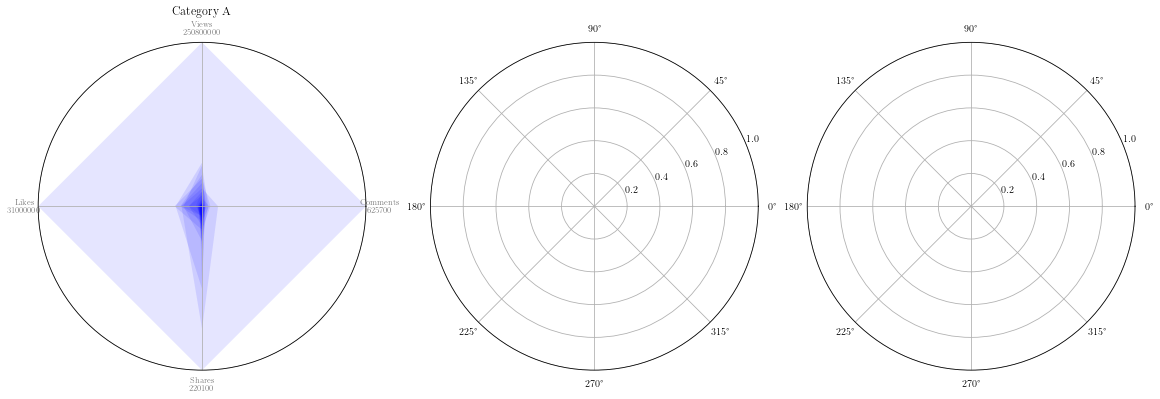

In [20]:
df=pd.read_csv('regression_viz.csv')
fig=plt.figure(figsize=(16,12),constrained_layout=True)
categories = ['commentCount', 'playCount', 'diggCount','shareCount']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
df_A=df[df['playCount']>=2800000]
df_B=df[(df['playCount']>=196900) & (df['playCount']<2800000)]
df_C=df[(df['playCount']<196900)]

min_max_scaler = preprocessing.MinMaxScaler()
df_A[categories] = min_max_scaler. fit_transform(df_A[categories])
df_B[categories] = min_max_scaler. fit_transform(df_B[categories])
df_C[categories] = min_max_scaler. fit_transform(df_C[categories])

ax = plt.subplot(131, polar=True)
ax1 = plt.subplot(132, polar=True)
ax2 = plt.subplot(133, polar=True)
for i in df_A.index:
    values = df_A.loc[i, categories]
    values=list(values)
    values += values[:1]
    #plt.xticks(angles[:-1], categories, color='grey', size=8)
    #ax.set_rlabel_position(0)
    #plt.yticks([0, 0.5, 1], ["10", "20", "Views – 250,800,000\nLikes – 2,000,000\nShares – 220,100\nComments – 625,700"], color="grey", size=7)
    ax.set_ylim(0, 1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['Comments\n'+str(np.max(df['commentCount'])),'Views\n'+str(np.max(df['playCount'])) , 'Likes\n'+str(np.max(df['diggCount'])),'Shares\n'+str(np.max(df['shareCount']))], color='grey', size=8)
    ax.set_yticks([1])
    ax.set_yticklabels([])
    ax.set_title('Category A')
    #ax.plot(angles, values, linewidth=1, linestyle='solid',color='red',alpha=0.5)
    #ax.plot(angles, values, linewidth=1, color='black', alpha=0.2)
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.show()
#80% for 43 2.8 mil videos then 15% 232 videos and rest 5% 196 900

In [21]:
len(df_B)

230

In [22]:
len(df_)

726

In [208]:
df_unique_videos.columns

Index(['Unnamed: 0', 'authorMeta.avatar', 'authorMeta.id', 'authorMeta.name',
       'authorMeta.nickName', 'authorMeta.secUid', 'authorMeta.signature',
       'authorMeta.verified', 'commentCount', 'cover.default', 'cover.dynamic',
       'cover.origin', 'createTime', 'diggCount', 'downloaded',
       'hashtag.cover', 'hashtag.id', 'hashtag.name', 'hashtag.title', 'id',
       'mentions', 'musicMeta.coverLarge', 'musicMeta.coverMedium',
       'musicMeta.coverThumb', 'musicMeta.musicAuthor', 'musicMeta.musicId',
       'musicMeta.musicName', 'musicMeta.musicOriginal', 'musicMeta.playUrl',
       'playCount', 'shareCount', 'text', 'videoMeta.duration',
       'videoMeta.height', 'videoMeta.width', 'videoUrl',
       'videoUrlNoWaterMark', 'webVideoUrl', 'text_len'],
      dtype='object')

In [1]:
from platform import python_version

print(python_version())

3.8.11
